In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy as sp
import scipy.stats


if not os.path.exists("Main_Figures"):
    os.makedirs("Main_Figures")

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return [m, m-h, m+h]

In [3]:
NamesDict = {'TotDen':'Average Bacterial Density','SucDen': 'Susceptible Bacteria Density',
             'ResDen': 'Resistant Bacteria Density','Rel_Freq': 'Resistant Relative Frequency',
       'Suc_D_Score': 'Susceptible D-Score', 'Res_D_Score':'Resistant D-Score', 'R_S_winratio':'Ratio of winners R/S',
       'NetDen':'Network Density','ClustC':'Global Clustering Coefficient','CloCentr':'Closeness Centrality',
        'ant_deg':'Connectivity of Antibiotic Source',
       'BetCentr':'Betweenness Centrality'}

def data_to_df(data):
    df = pd.DataFrame({'TotDen':np.divide([i[0] for i in data],50),'SucDen':np.divide([i[1] for i in data],50),'ResDen':np.divide([i[2] for i in data],50),
     'Rel_Freq':[i[2]/(i[1]+i[2]) for i in data], 'Suc_D_Score':np.divide([i[3] for i in data],50), 'Res_D_Score':np.divide([i[4] for i in data],50), 
     'R_S_winratio':[i[4]/(i[3]+i[4]) for i in data], 'NetDen':[i[6] for i in data],'ClustC':[i[7] for i in data],
     'CloCentr':[i[8] for i in data],'AntDeg':[i[9] for i in data], 'BetCentr':[i[10] for i in data]})
   
    return df

In [4]:
ntype="watts" #watts or erdos
runs = ["runs/20171127_155235_Sim_Watts_Density/out_"+ntype, "runs/20171127_173120_Sim_Watts_Density/out_"+ntype,
       "runs/20171127_182322_Sim_Watts_Density/out_"+ntype,"runs/20171127_182957_Sim_Watts_Density/out_"+ntype]

In [5]:
data = [data_to_df(np.genfromtxt(run,delimiter="\t")) for run in runs]

In [6]:
 def obtain_line_intervals2plot(data,col1,col2,confidence=0.95):
    x_values = [datapoint[0] for datapoint in data.groupby([col1],as_index=False)]
    mean_ConfInt = [mean_confidence_interval(datapoint[1][col2]) for datapoint in data.groupby([col1],as_index=False)]
    return x_values,mean_ConfInt

In [9]:
def plot_datasets(data_array,col1,cols2):
    fontsize=15
    f, ax_vec = plt.subplots(len(cols2), sharex=True, sharey=False, figsize=(12,10))
    
    for i in range(len(cols2)):
        ax = ax_vec[i]
        for dset in data_array:
            x_vals,mci = obtain_line_intervals2plot(dset,col1,cols2[i])
            mean_vals = [point[0] for point in mci]
            #lower_ConfInt = [point[1] for point in mci]
            #upper_ConfInt = [point[2] for point in mci]

            ax.plot(x_vals,mean_vals)
            #ax.fill_between(x_vals,lower_ConfInt,upper_ConfInt,alpha=0.5)
        if i==len(cols2)-1:
            ax.set_xlabel(NamesDict[col1])
            ax.legend([20,40,60,80],title="Antibiotic Concentration")

        ax.set_ylabel(NamesDict[cols2[i]])

        if i==0:
            ax.set_title(NamesDict[col1]+" effect on Resistance Selection under different antibiotic pressures",y=1.07)

        if cols2[i]== 'TotDen':
            ax.set_ylim(0,np.max([dset['TotDen'] for dset in data_array]),50)
       
        #ax.set_xlim(0,0.4)
    
    f.subplots_adjust(wspace=0.0,hspace=0.05)
         
        
    plt.savefig("Main_Figures/ND_and_Ant_Eff_on_"+NamesDict[cols2[0]]+"_and_"+NamesDict[cols2[1]]+".png",dpi=200)
    plt.show()

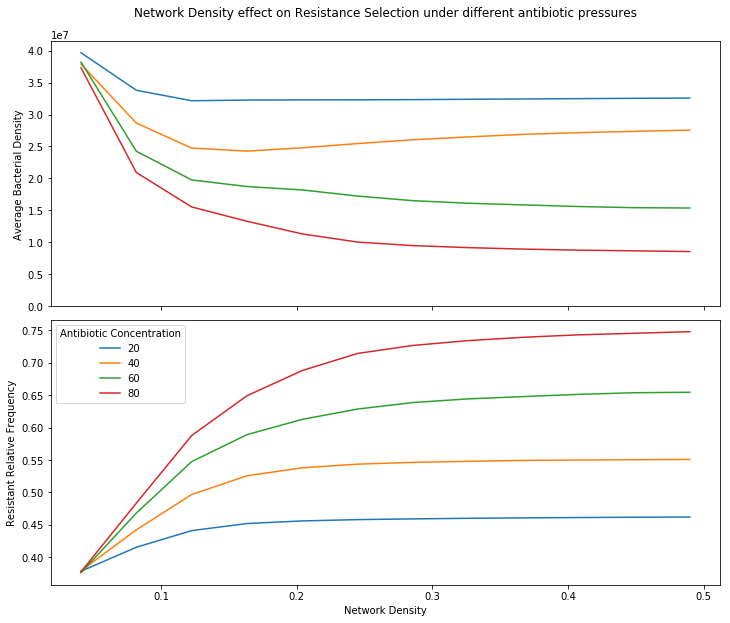

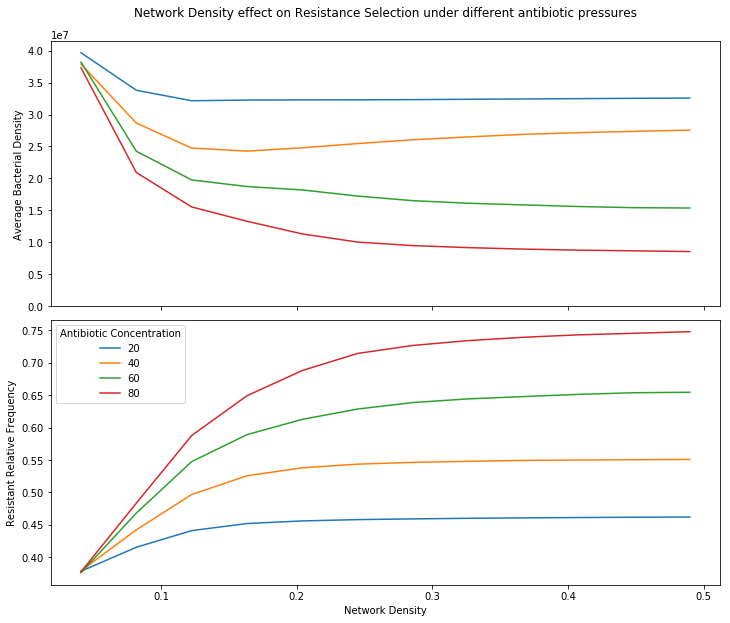

In [10]:
plot_datasets(data,'NetDen',['TotDen','Rel_Freq'])

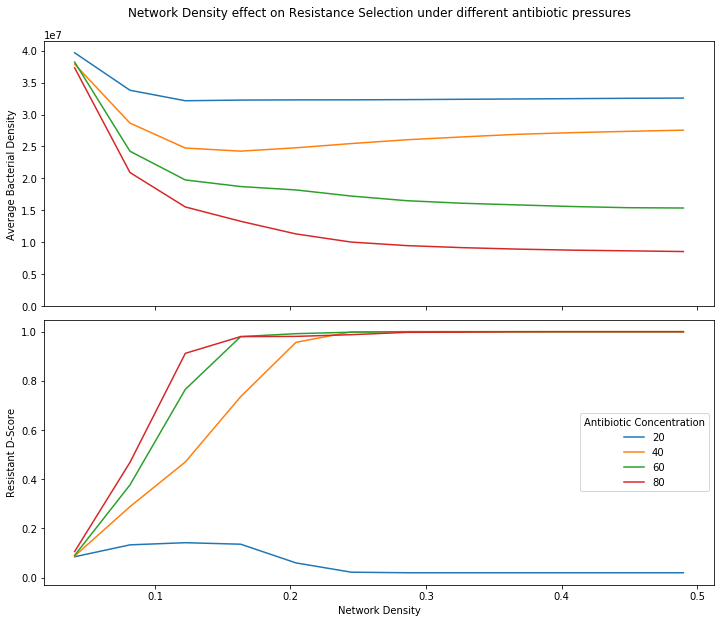

In [11]:
plot_datasets(data,'NetDen',['TotDen','Res_D_Score'])

In [12]:
def plot_datasets_together(data_array,cols_to_x,cols_to_y):
    fontsize=12
    f, ax_vec = plt.subplots(nrows=len(cols_to_x),ncols=len(cols_to_y), sharex='col', sharey='row', figsize=(10,10))

    for i in range(2): 
        for j in range(2):
        
            ax = ax_vec[i][j]
            
            for dset in data_array:
                x_vals,mci = obtain_line_intervals2plot(dset,cols_to_x[j],cols_to_y[i])
                mean_vals = [point[0] for point in mci]
                lower_ConfInt = [point[1] for point in mci]
                upper_ConfInt = [point[2] for point in mci]

                ax.plot(x_vals,mean_vals)
                ax.fill_between(x_vals,lower_ConfInt,upper_ConfInt,alpha=0.5)
            
            if i==1 and j==0:
                ax_vec[i][j].legend([20,40,60,80],title="Antibiotic Dose")
            
            if i==1:
                ax.set_xlabel(NamesDict[cols_to_x[j]],fontsize=fontsize)
                

            if j==0:
                ax_vec[i][0].set_ylabel(NamesDict[cols_to_y[i]],fontsize=fontsize)

            if cols_to_y[i] == 'Rel_Freq':
                ax.hlines(y=0.5,xmin=np.min([dset[cols_to_x[j]] for dset in data_array]),xmax=np.max([dset[cols_to_x[j]] for dset in data_array]),colors='r',linestyles='dashed')
    
            elif cols_to_y[i]== 'TotDen':
                    ax.set_ylim(0,np.max([dset['TotDen'] for dset in data_array]))
            
        #ax_vec[index][0].set_title("Network Density and Antibiotic effect on Resistance Selection",y=1.08,fontsize=fontsize)

            


        
    f.subplots_adjust(wspace=0,hspace=0.05)
    
    plt.savefig("Main_Figures/Cen_ND_Ant_Eff_on_ResSel_"+ntype+".png")
    plt.show()

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


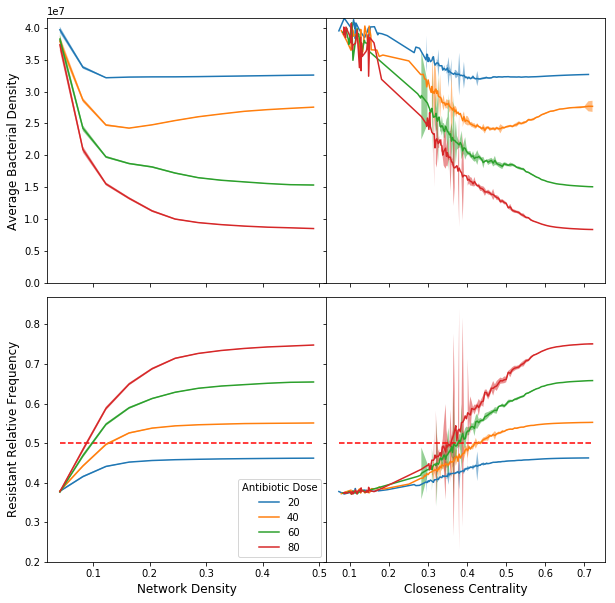

In [13]:
plot_datasets_together(data,['NetDen','CloCentr'],['TotDen','Rel_Freq'])